# 02 Check existing waves in the data base

1) Import de las librerias que utilizaremos

In [1]:
import psycopg2
import numpy as np
import collections
import matplotlib.pyplot as plt

2) Conexion a la base de datos

In [2]:
conn = psycopg2.connect("dbname=test")
cur = conn.cursor()

3) Select de los valores

In [3]:
select_stament = 'select lef.signame from waveformFields lef left join (select max(recorddate) as recorddate,subject_id from waveformFields group by subject_id) rig on lef.subject_id = rig.subject_id and lef.recorddate = rig.recorddate where rig.subject_id is not null order by lef.subject_id'
cur.execute(select_stament)

In [4]:
patient = []
for row in cur:
    patient += row[0]
#    np.concatenate((patient, np.array(row)))

In [5]:
conn.close()

Posibles Ondas que existen

In [6]:
labels, values = zip(*collections.Counter(patient).items())
print(labels)

('MCL1+', 'P4', 'CO2', '[0]++', 'MCL', 'RESP', 'ART', 'ABP', 'UAP', 'PLETHr', 'AVL', 'UVP', '[0]', 'II+', 'RAP', 'V1', '[0]+', 'III', 'aVR', 'aVF', 'aVL', 'MCL1', 'IC1', 'ICP', 'PLETH L', 'P1', 'PLETH R', 'CVP', 'II', 'I+', 'III+', 'V', 'Ao', '[0]+++', 'LAP', 'AVF', 'I', 'PAP', 'AVR', 'PLETH', '[0]++++', '???', 'ECG', 'AOBP', 'Resp', 'V+')


Muestrame el top 15 de las Ondas mas comunes

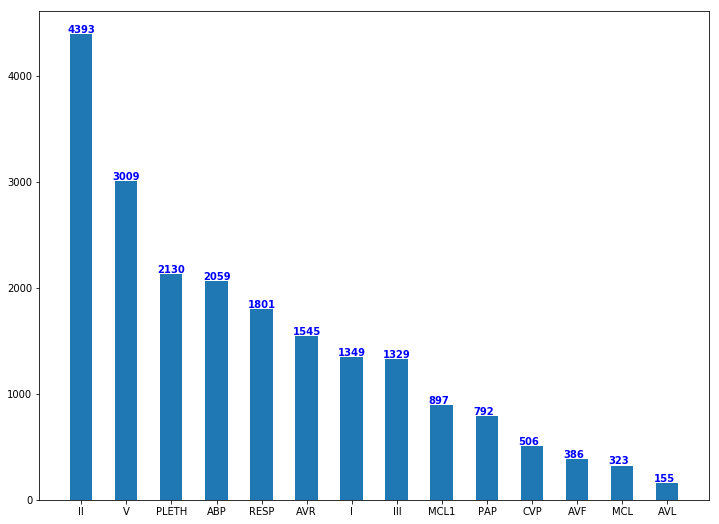

In [7]:
labels, values = zip(*collections.Counter(patient).most_common(14))
indexes = np.arange(len(labels))
width = 0.5
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots() 
for i, v in enumerate(values):
    ax.text(i-0.3,v+12, str(v), color='blue', fontweight='bold')
    
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)
plt.show()